In [1]:
import django
import os
import json
os.environ['DJANGO_SETTINGS_MODULE'] = 'django_settings'
django.setup()

In [35]:
from IPython.display import Image
from IPython.core.display import HTML 
import requests
import math

In [3]:
from web_crawler.models import *

In [5]:
aws_url = 'https://monde-web-crawler.s3.ap-northeast-2.amazonaws.com/'

In [91]:
f = CategoryCategories.objects.last()

In [92]:
url=f.bag_image.bag_image.url

In [93]:
URL = aws_url + url
print(URL)

https://monde-web-crawler.s3.ap-northeast-2.amazonaws.com/crawled-image/MYXCGH8X9LK_1.jpg


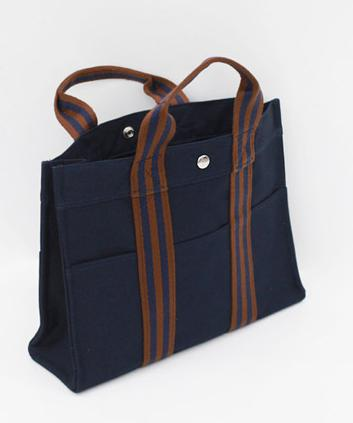

In [94]:
Image(requests.get(URL).content)

In [12]:
user_input = {
    "shape" : "bucket",
    "color" : "blue",
    "handle" : "tote"
}

In [22]:
def is_include(value, data):
    if value in data:
        return True
    return False

In [23]:
def get_data_result(category, instance):
    s_data = instance.shape_result
    h_data = instance.handle_result
    ch_data = instance.charm_result
    co_data = instance.color_result
    d_data = instance.deco_result
    p_data = instance.pattern_result
    if category == 'shape':
        return(s_data)
    elif category == 'handle':
        return(h_data)
    elif category == 'charm':
        return(ch_data)
    elif category == 'color':
        return(co_data)
    elif category == 'deco':
        return(d_data)
    elif category == 'pattern':
        return(p_data)
    return None

In [38]:
def pass_filter(value, count):
    result = value * math.sqrt(((count/10) + 1) * count)
    return result

In [50]:
def product_overlap_count(user_input, instance):
    count = 0
    value = 0
    weight = 2
    
    for category in user_input.keys():
        data = get_data_result(category, instance)
        user_select = user_input[category]
        if user_select in data:
            count +=1
            value += data[user_select] * weight
            
    if count == 0:
        pass
    
    result = pass_filter(value, count)


    return instance, result

In [ ]:
# 결과값이 0인 것들도 보여줘야 할까? 보여주는거 vs 안보여주고 데이터 조금 보여주는거

In [84]:
def filtered_data(instance, user_input, result_dict):
    i, result = product_overlap_count(user_input, instance)
    if result != 0:
        result_dict[i]=result
    else:
        pass
    return result_dict

In [85]:
result_dict={}
for i in CategoryCategories.objects.all():
    result_dict = filtered_data(i, user_input, result_dict)

In [ ]:
# TODO : weight 정하기. 선택하는 순서에 따라?

In [90]:
sorted_x = sorted(result_dict.items(), key=lambda kv: kv[1], reverse=True)